In [1]:
from urllib.request import urlopen, urlretrieve 


import os
import re
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

##  Define functions

In [2]:
def load_dataset(data_path, **kws):
    '''
    load an dataset from local fileSystem, 
    if load file fail, then load an dataset from the online repository (requires internet).

    Parameters
    ----------
    data_path : string,
        the dataset path in local fileSystem.
    kws : keys and values, optional
        Additional keyword arguments are passed through to func: 'pandas.read_csv'.
    Returns
    -------
    data_frame : pandas.DataFrame
    '''
    
    try:
        from urllib import request, error
        from io import StringIO
        import pandas as pd
        import os
        import csv
    except ImportError as e:
        raise ImportError('You must install ' + e.name) from e
    
    local_cache = True
    if data_path is None:
        raise ValueError('dataset path invalid.')
    if not os.path.exists(data_path):
        local_cache = False
        data_name = os.path.basename(data_path)
        url = 'https://raw.githubusercontent.com/Crystal-girl/learning-seaborn/master/seaborn-data/'
        data_url = os.path.join(url, data_name)
        try:
            data = request.urlopen(data_url).read().decode('utf-8').split('\n')
        except error.URLError as e:
            raise error.URLError('neither local and online dataset not found.') from e
        data_file = StringIO(data)
        csv_reader = csv.reader(data_file)
        data_list = [raw for raw in csv_reader]
        data_frame = pd.DataFrame(data_list[1: ], columns=data_list[0])
        return data_frame
    
    data_frame = pd.read_csv(data_path, **kws)
    return data_frame

In [3]:
# this is my local dataset path, need to be changed to your own dataset path. 
# 需要更改为文件读取的本地路径
path = 'E:\learning-seaborn\seaborn-data' 

## Relational plots
* relplot
* scatterplot
* lineplot

### relplot
> 用于将关系图绘制到FacetGrid上的图形级界面。
* 参数详解见: http://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

In [4]:
sns.set_style(style='ticks')

tips = load_dataset(os.path.join(path, 'tips.csv'))
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips['day'] = tips['day'].astype('category')
tips['sex'] = tips['sex'].astype('category')
tips['time'] = tips['time'].astype('category')
tips['smoker'] = tips['smoker'].astype('category')

In [6]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

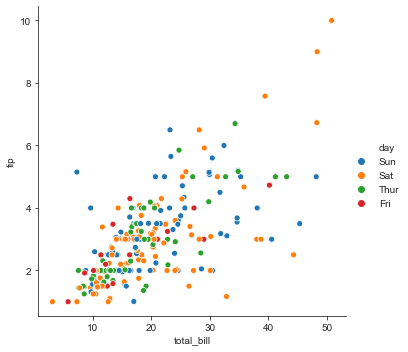

In [7]:
# Assigning x and y and any semantic mapping variables will draw a single plot.
# 指定参数 x、y 与 hue(包含多元素变量)，将被绘制在一张图中。
sns.relplot(data=tips, x='total_bill', y='tip', hue='day')

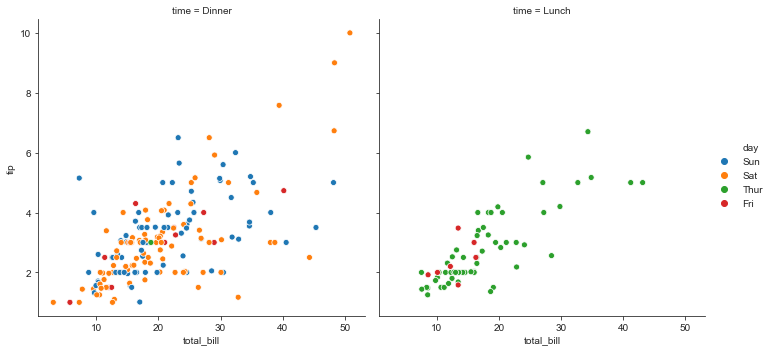

In [8]:
# Assigning a col variable creates a faceted figure with multiple subplots arranged across the columns of the grid.
# 指定参数 x、y、hue(包含多元素变量) 与 绘制 n(n为指定col所包含的类别数量或离散值个数) 张子图的col，将n张子图呈网格状态绘制在一张图中。
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', col='time')

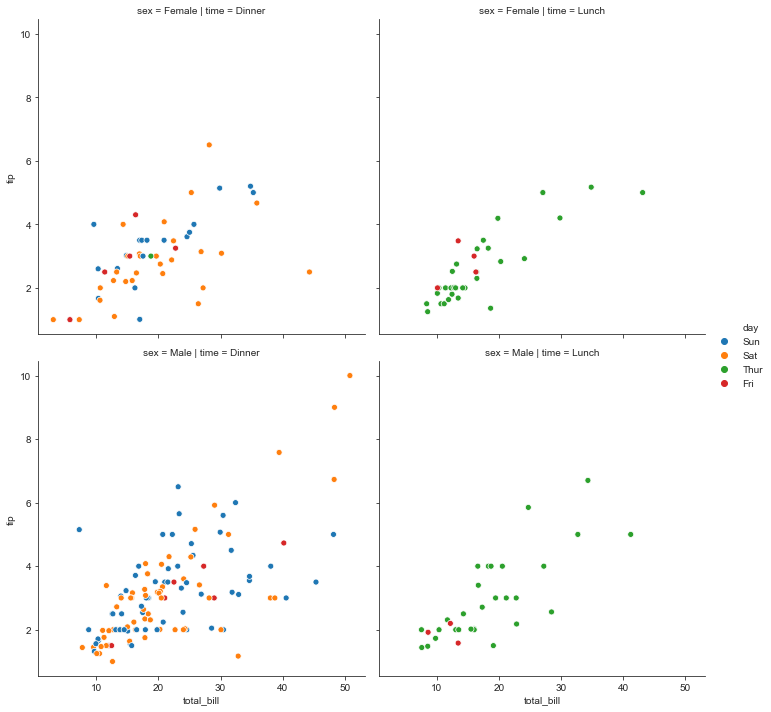

In [9]:
# Different variables can be assigned to facet on both the columns and rows.
'''
指定参数 x、y、hue(包含多元素变量)、col 与 row，绘制 n * m(col 与 row 所包含元素的笛卡尔积，n为指定col 所包含的类别数量或离散值个数,
m为指定raw 所包含的类别数量或离散值个数) 张子图，将n * m张子图呈网格状态绘制在一张图中。
'''
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', col='time', row='sex')

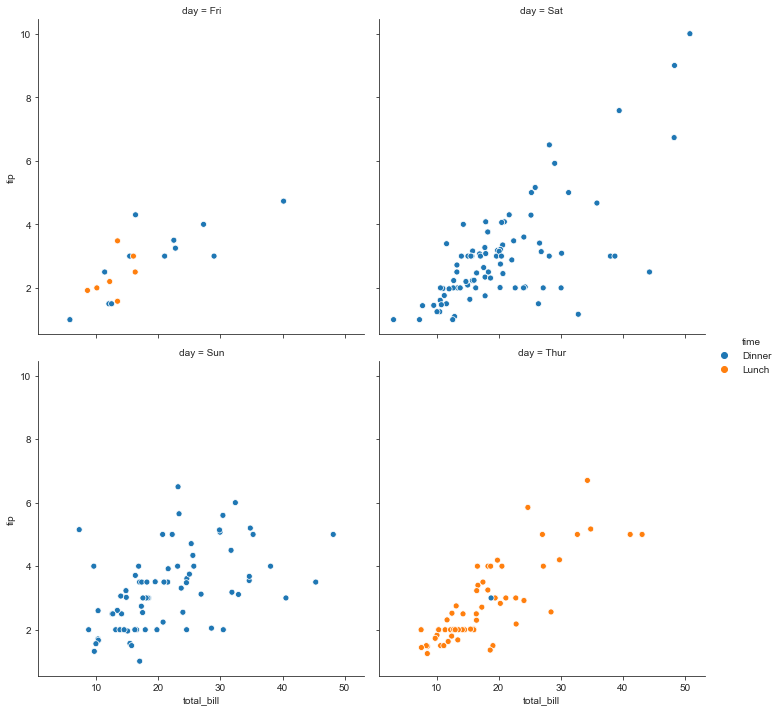

In [10]:
# When the variable assigned to col has many levels, it can be 'wrapped' across multiple rows.
# 当指定参数 col 包含多个元素时， 可以指定参数 col_wrap 限制 绘制col 子图的宽度。
sns.relplot(data=tips, x='total_bill', y='tip', hue='time', col='day', col_wrap=2)

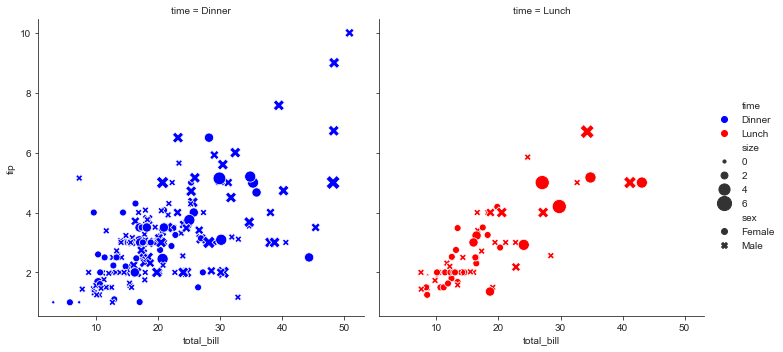

In [11]:
# Assigning multiple semantic variables can show multi-dimensional relationships, but be mindful to avoid making an overly-complicated plot.
'''
分配多个语义变量可以显示多维关系，但请注意避免绘制过于复杂的图。
参数size 指定 为变量的元素集合，参数style 指定 为变量的元素集合，
参数palette 指定 为 hue 子图配色， 参数sizes 指定 为 size 取值的范围。
'''
sns.relplot(
    data=tips, x='total_bill', y='tip', col='time',
    hue='time', size='size', style='sex',
    palette=['blue', 'red'], sizes=(10, 200)
)

In [12]:
fmri = load_dataset(os.path.join(path, 'fmri.csv'))
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [13]:
fmri['event'] = fmri['event'].astype('category')
fmri['region'] = fmri['region'].astype('category')

In [14]:
fmri.dtypes

subject        object
timepoint       int64
event        category
region       category
signal        float64
dtype: object

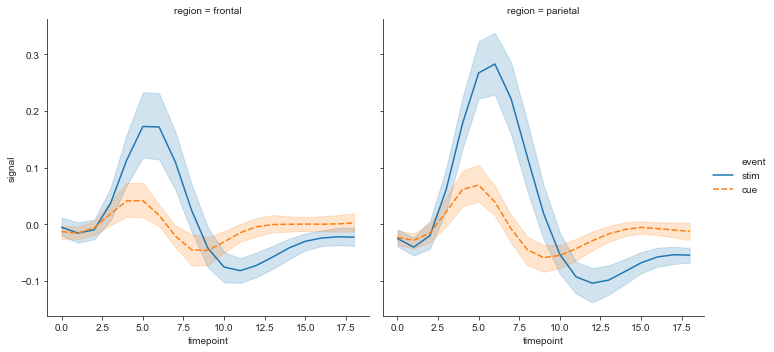

In [15]:
'''
When there is a natural continuity to one of the variables, it makes more sense to show lines instead of points.
Using kind='line' offers the same flexibility for semantic mappings as kind='scatter', 
but lineplot() transforms the data more before plotting. 
'''
'''
当其中一个变量具有自然连续性时，更有意义的是显示线而不是点。使用参数 kind='line' 提供与 kind ='scatter' 相同的灵活性，
但是lineplot() 可以在绘制之前对数据进行更多的转换。
'''
sns.relplot(
    data=fmri, x='timepoint', y='signal', col='region',
    hue='event', style='event', kind='line',
)

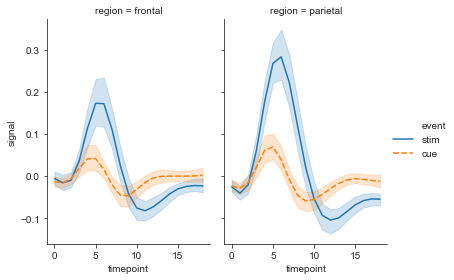

In [16]:
# The size and shape of the figure is parametrized by the height and aspect ratio of each individual facet.
'''
参数 height 指定每一个子图的高度，参数 aspect 指定每一个子图宽度的缩放比例。
'''
sns.relplot(
    data=fmri,
    x='timepoint', y='signal',
    hue='event', style='event', col='region',
    height=4, aspect=.7, kind='line'
)

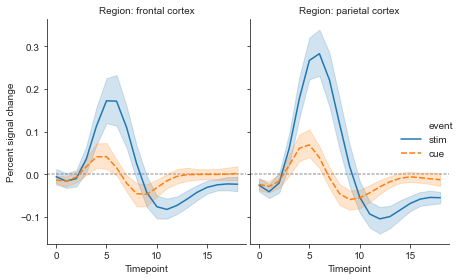

In [17]:
'''
The object returned by relplot() is always a FacetGrid, which has several methods that allow you to quickly tweak the title, labels,
and other aspects of the plot.
'''
'''
replot()返回对象为 FaceGrid，提供许多内置函数，可以改变图标题、标签和其他功能。
'''
g = sns.relplot(
    data=fmri,
    x='timepoint', y='signal',
    hue='event', style='event', col='region',
    height=4, aspect=.7, kind='line'
)
'''
#1 针对参考代码进行修改  .tight_layout => .fig.tight_layout
''' 
g.map(plt.axhline, y=0, color='.7', dashes=(2, 1), zorder=0) \
    .set_axis_labels('Timepoint', 'Percent signal change') \
    .set_titles('Region: {col_name} cortex') \
    .fig.tight_layout(w_pad=0)  

In [18]:
flights_wide = load_dataset(os.path.join(path, 'flights.csv')).pivot('year', 'month', 'passengers')
flights_wide.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237


In [19]:
flights_wide.dtypes

month
April        int64
August       int64
December     int64
February     int64
January      int64
July         int64
June         int64
March        int64
May          int64
November     int64
October      int64
September    int64
dtype: object

![Aaron Swartz](raw.githubusercontent.com/Crystal-girl/learning-seaborn/master/pic_issues/dashes_issue.png)

* seaborn relplot 绘制图时，参数dashes 默认为True, 不指定dashes参数时, 采用函数内部定义参数 default_dashes，default_dashes 只包含6个dash配置，当dash配置超过6个时，则需要用户指定参数dashes 使dashes和变量的长度保持一致。(dash 配置元组长度需为偶数。)

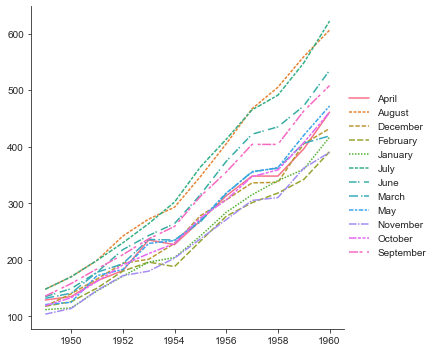

In [20]:
 '''
 #2 针对参考代码进行修改 增加 dashes 参数设置
 '''
dashes = ['', (2, 1), (3, 1.2), (4, 1.5), (1, 1), (3, 1, 2, 1), (5, 1, 1, 3), (6, 2, 1, 1),
        (3, 1, 1.5, 1), (5, 1, 1, 1), (5, 1, 2, 1, 2, 1), (6, 1, 2, 3, 2, 1)
    ]
sns.relplot(data=flights_wide, dashes=dashes, kind='line')

### scatterplot
> 绘制散点图，其中可能包含几个语义分组。
* 参数详解见: http://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

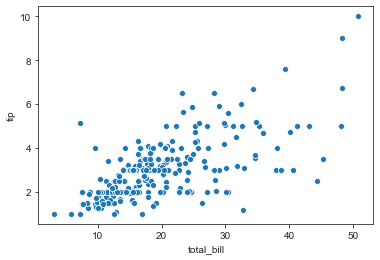

In [21]:
# Passing long-form data and assigning x and y will draw a scatter plot between two variables.
# 指定 参数 x 与 参数 y，绘制散点图。
sns.scatterplot(data=tips, x='total_bill', y='tip')

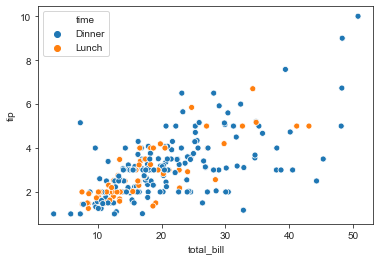

In [22]:
# Assigning a variable to hue will map its levels to the color of the points.
# 指定参数 hue，根据 hue 的levels 映射散点的颜色。
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

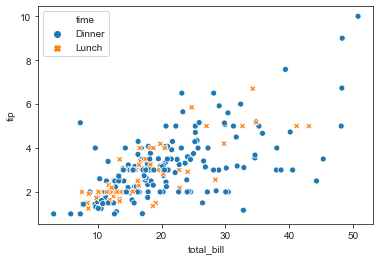

In [23]:
# Assigning the same variable to style will also vary the markers and create a more accessible plot.
# 指定参数 style 与参数 hue 相同，散点不仅有区分颜色，而且有区分标记。
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='time')

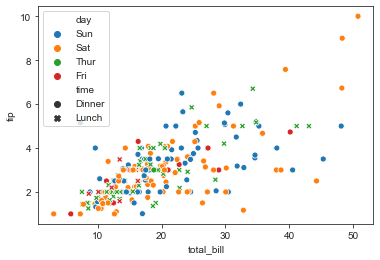

In [24]:
# Assigning hue and style to different variables will vary colors and markers independently.
# 指定参数 style 与 参数 hue 不同，散点的颜色和标记是相互独立的。
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='time')

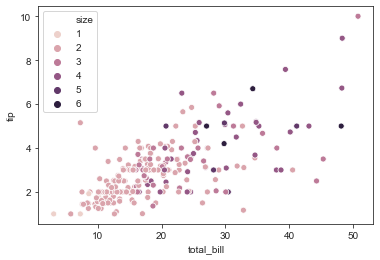

In [25]:
# If the variable assigned to hue is numeric, the semantic mapping will be quantitative and use a different default palette.
# 指定参数 hue 若为 数值变量，则数值变量将被映射为定量且使用默认调色板。
'''
#1 针对参考代码进行修改 增加 legend 参数设置
''' 
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', legend='full') 

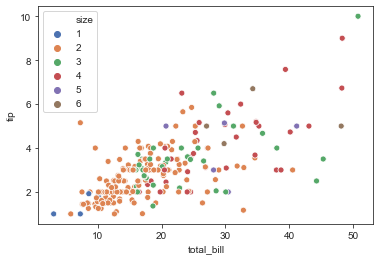

In [26]:
# Pass the name of a categorical palette or explicit colors (as a Python list of dictionary) to force categorical mapping of the hue variable.
# 指定参数palette ，强制转换参数 hue。（建议指定参数 palette 使 hue 展示更加明确。)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', palette='deep')

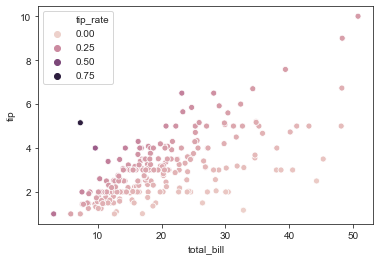

In [27]:
# If there are a large number of unique numeric values, the legend will show a representative, evenly-spaced set.
# 指定参数 hue 的取值包含大量唯一的数值，legend 显示具有代表性、均匀分布的集合。
tip_rate = tips.eval('tip / total_bill').rename('tip_rate')
sns.scatterplot(data=tips, x='total_bill', y='tip', hue=tip_rate)

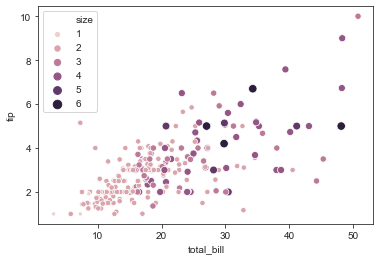

In [28]:
# A numeric variable can also be assigned to size to apply a semantic mapping to the areas of the points.
# 指定参数 size 与 参数 hue 同为数值类型，size 映射至 hue 对应的散点上。 
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', size='size', legend='full')

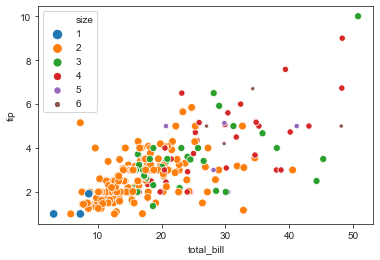

In [29]:
# 以下示例 将数值类型转化为类别类型的展示结果。
tips['size'] = tips['size'].astype('category')
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', size='size')

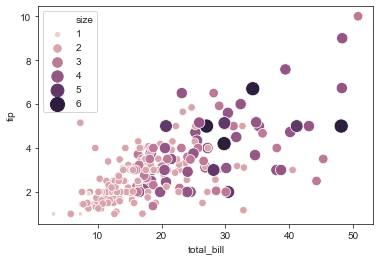

In [30]:
# Control the range of marker areas with sizes, and set lengend='full' to force every unique value to appear in the legend.
# 指定参数 sizes，参数 legend。
tips['size'] = tips['size'].astype('int64')
sns.scatterplot(
    data=tips, x='total_bill', y='tip', hue='size', size='size',
    sizes=(20, 200), legend='full'
)

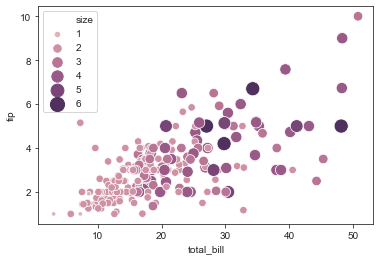

In [31]:
# Pass a tuple of values or a matplotlib.colors.Normalize object to hue_norm to control the quantitative hue mapping.
# 指定参数 hue_norm 将 hue 的取值进行映射。
sns.scatterplot(
    data=tips, x='total_bill', y='tip', hue='size', size='size',
    sizes=(20, 200), hue_norm=(0, 7), legend='full'
)

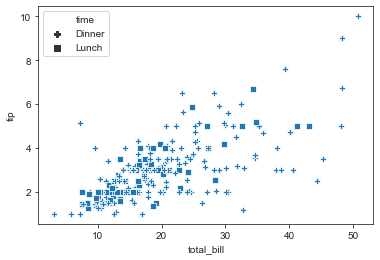

In [32]:
# Control the specific markers used to map the style variable by passing a Python list or dictionary of marker codes.
# 设置参数 markers 更改 参数 style 的形状。
# markers 可选设置 default_markers = ["o", "X", "s", "P", "D", "^", "v", "p"]
markers = {'Lunch': 's', 'Dinner': 'P'}
sns.scatterplot(data=tips, x='total_bill', y='tip', style='time', markers=markers)

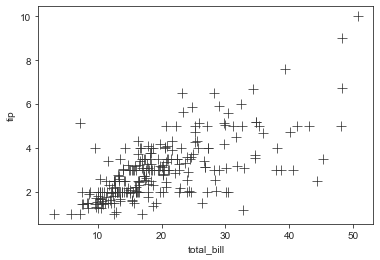

In [33]:
# Additional keyword arguments are passed to matplotlib.axes.Axes.scatter(), 
# allowing you to directly set the attributes of the plot that are not semantically mapped.
# 其他关键字参数将传递给matplotlib.axes.Axes.scatter（），可以直接设置未在语义上映射的图的属性。
sns.scatterplot(data=tips, x='total_bill', y='tip', s=100, color='.2', marker='+')

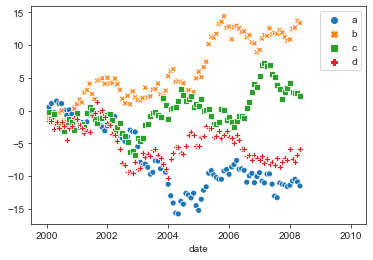

In [34]:
# 使用宽格式数据时，将同时使用色相和样式映射将每列与其索引相对应地绘制。
index = pd.date_range('1 1 2000', periods=100, freq='m', name='date')
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ['a', 'b', 'c', 'd'])
sns.scatterplot(data=wide_df)

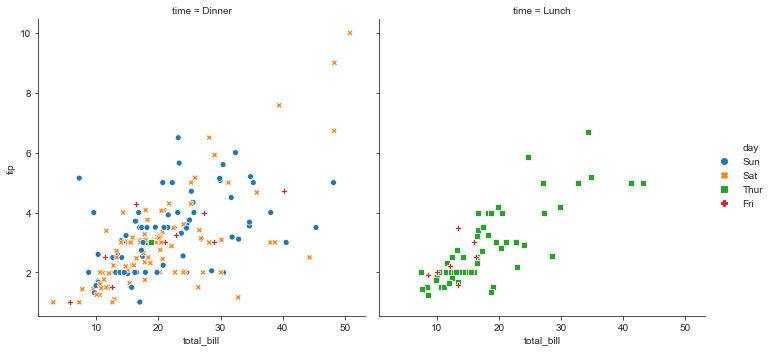

In [35]:
'''
Use relplot() to combine scatterplot() and FacetGrid. This allows grouping within additional categorical variables,
and plotting them across multiple subplots.
Using relplot() is safer than using FacetGrid directly, as it ensures synchronization of the semantic mappings across facets.
'''
'''
使用relplot 指定参数 kind='scatter' 实现分类别子图的散点图。
'''
sns.relplot(
    data=tips, x='total_bill', y='tip',
    col='time', hue='day', style='day',
    kind='scatter'
)

### lineplot
> 绘制线型图，其中可能包含几个语义分组。
* 参数详解见: http://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot

In [36]:
flights = load_dataset(os.path.join(path, 'flights.csv'))
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [37]:
months = flights['month'].str[: 3]
flights['month'] = pd.Categorical(months, months.unique())

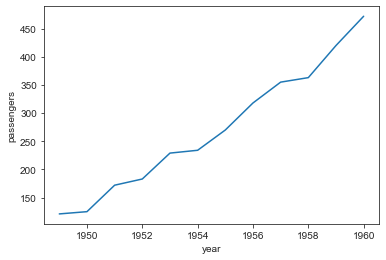

In [38]:
# To draw a line plot using long-form data, assign the x and y variables.
# 指定参数 x, y，绘制线型图。
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x='year', y='passengers')

In [39]:
flights_wide = flights.pivot('year', 'month', 'passengers')
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


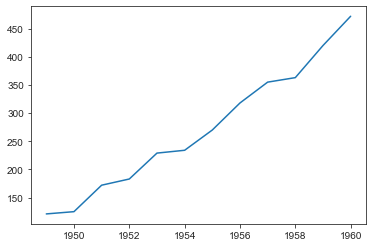

In [40]:
# To plot a single vector, pass it to data. If the vector is a pandas.Series, it will be plotted against its index.
# 绘制单个矢量，根据索引进行绘制。
sns.lineplot(data=flights_wide['May'])

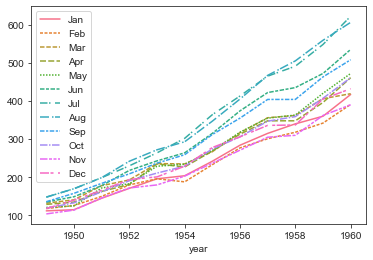

In [41]:
'''
#1 针对参考代码进行修改,修改dataframe包含列，增加 dashes 参数设置
'''
dashes = ['', (2, 1), (3, 1.2), (4, 1.5), (1, 1), (3, 1, 2, 1), (5, 1, 1, 3), (6, 2, 1, 1),
        (3, 1, 1.5, 1), (5, 1, 1, 1), (5, 1, 2, 1, 2, 1), (6, 1, 2, 3, 2, 1)
    ]
flights_wide.columns = pd.Index(list(flights_wide.columns))
sns.lineplot(data=flights_wide, dashes=dashes)

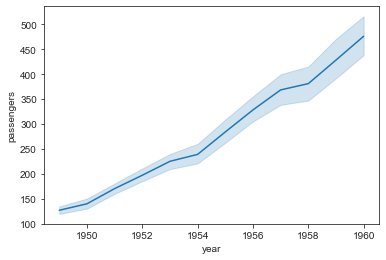

In [42]:
# Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval.
# 以长格式传递整个数据集将汇总重复的值（每年）以显示平均值和95％置信区间。
sns.lineplot(data=flights, x='year', y='passengers')

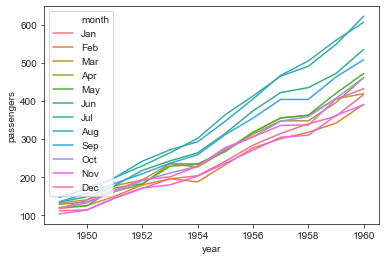

In [43]:
# Assign a grouping semantic (hue, size, or style) to plot separate lines.
# 指定参数 x, y, hue
sns.lineplot(data=flights, x='year', y='passengers', hue='month')

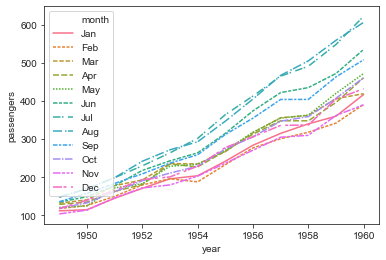

In [44]:
'''
#2 针对参考代码进行修改，增加 dashes 参数设置
'''
dashes = ['', (2, 1), (3, 1.2), (4, 1.5), (1, 1), (3, 1, 2, 1), (5, 1, 1, 3), (6, 2, 1, 1),
        (3, 1, 1.5, 1), (5, 1, 1, 1), (5, 1, 2, 1, 2, 1), (6, 1, 2, 3, 2, 1)
    ]
sns.lineplot(data=flights, x='year', y='passengers', hue='month', style='month', dashes=dashes)

In [45]:
fmri = load_dataset(os.path.join(path, 'fmri.csv'))
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


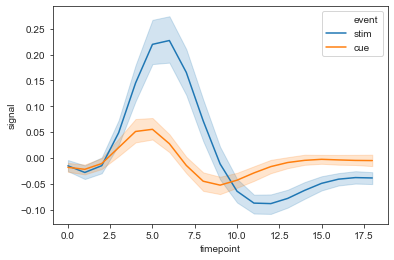

In [46]:
# Repeated observations are aggregated even when semantic grouping is used.
# 重复观察分组数据。
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event')

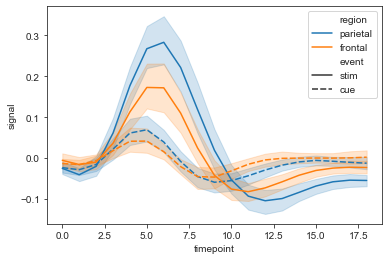

In [47]:
# Assign both hue and style to represent two different grouping variables.
# 指定参数 hue 与 style, 展示多类型线型图。
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='region', style='event')

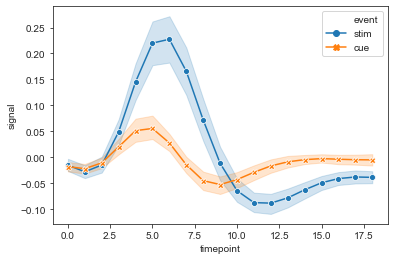

In [48]:
# When assigning a style variable, markers can be used instead of (or along with) dashes to distinguish the groups.
# 分配样式变量时，可以使用标记代替破折号（或与破折号一起使用）来区分组。
sns.lineplot(
    data=fmri,
    x='timepoint', y='signal', hue='event', style='event',
    markers=True, dashes=False
)

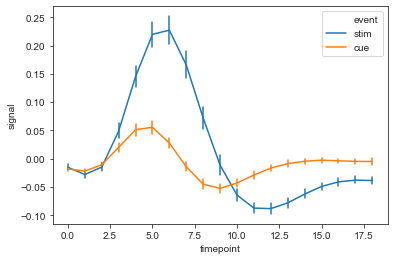

In [49]:
# Show error bars instead of error bands and plot the 68% confidence interval (standard error).
# 显示误差线而不是误差带，并绘制68％置信区间（标准误差）。
sns.lineplot(
    data=fmri, x='timepoint', y='signal', hue='event', err_style='bars', ci=68
)

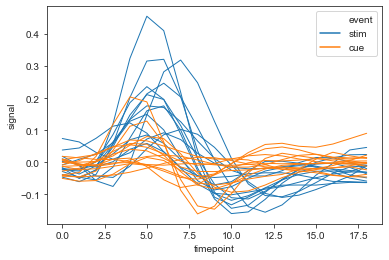

In [50]:
# Assigning the units variable will plot multiple lines without applying a semantic mapping.
# 分配units变量将在不应用语义映射的情况下绘制多条线。
sns.lineplot(
    data=fmri.query("region == 'frontal'"),
    x='timepoint', y='signal', hue='event', units='subject',
    estimator=None, lw=1
)

In [51]:
dots = load_dataset(os.path.join(path, 'dots.csv')).query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


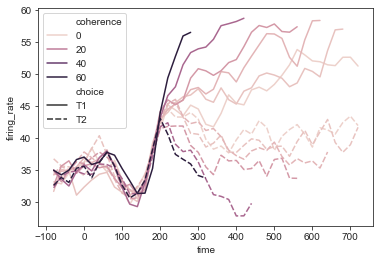

In [52]:
# Assigning a numeric variable to hue maps it differently, using a different default palette and a quantitative color mapping.
# 使用不同的默认调色板和定量颜色映射将数字变量映射为对应的颜色填充。
sns.lineplot(
    data=dots, x='time', y='firing_rate', hue='coherence', style='choice'
)

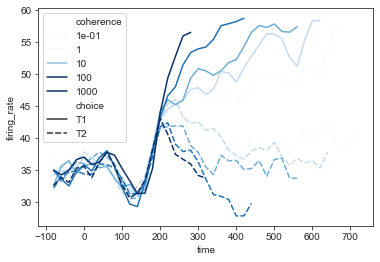

In [53]:
# Control the color mapping by setting the palette and passing a matplotlib.colors.Normalize object.
# 通过设置调色板并传递matplotlib.colors.Normalize对象来控制颜色映射。
'''
#3 针对参考代码进行修改，修改 palette 参数设置
'''
sns.lineplot(
    data=dots.query("coherence > 0"),
    x='time', y='firing_rate', hue='coherence', style='choice',
    palette='Blues', hue_norm=mpl.colors.LogNorm()
)

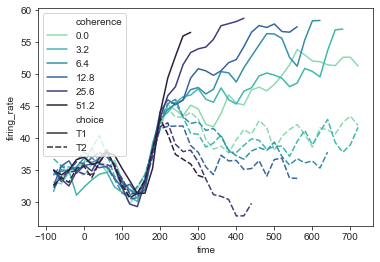

In [54]:
# Or pass specific colors, either as a Python list or dictionary.
# 或通过Python列表或字典传递特定颜色。
palette = sns.color_palette('mako_r', 6)
sns.lineplot(
    data=dots, x='time', y='firing_rate',
    hue='coherence', style='choice',
    palette=palette
)

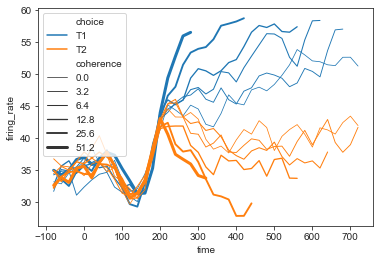

In [55]:
# Assign the size semantic to map the width of the lines with a numeric variable.
# 设置参数 size 以使用数字变量映射线的宽度。
sns.lineplot(
    data=dots, x='time', y='firing_rate',
    size='coherence', hue='choice',
    legend='full'
)

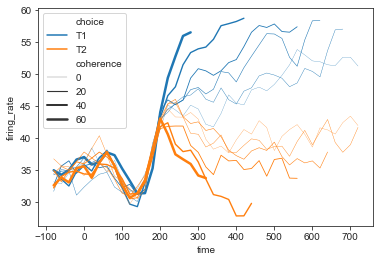

In [56]:
# Pass a a tuple, sizes=(smallest, largest), to control the range of linewidths used to map the size semantic.
# 设置参数 sizes 控制线的宽度 并对应映射参数 size。
sns.lineplot(
    data=dots, x='time', y='firing_rate',
    size='coherence', hue='choice',
    sizes=(.25, 2.5)
)

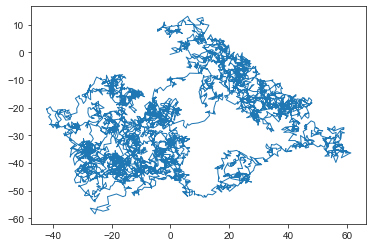

In [57]:
x, y = np.random.normal(size=(2, 5000)).cumsum(axis=1)
sns.lineplot(x=x, y=y, sort=False, lw=1)

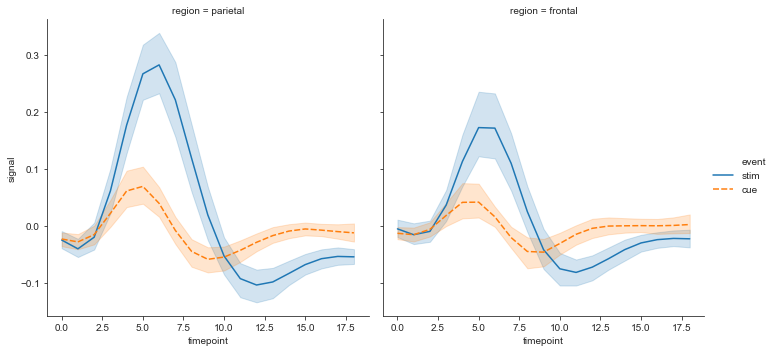

In [58]:
# 使用relplot 绘制 lineplot 类型图形。
sns.relplot(
    data=fmri, x='timepoint', y='signal',
    col='region', hue='event', style='event',
    kind='line'
)